**Import all libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

**Generating data using Function**

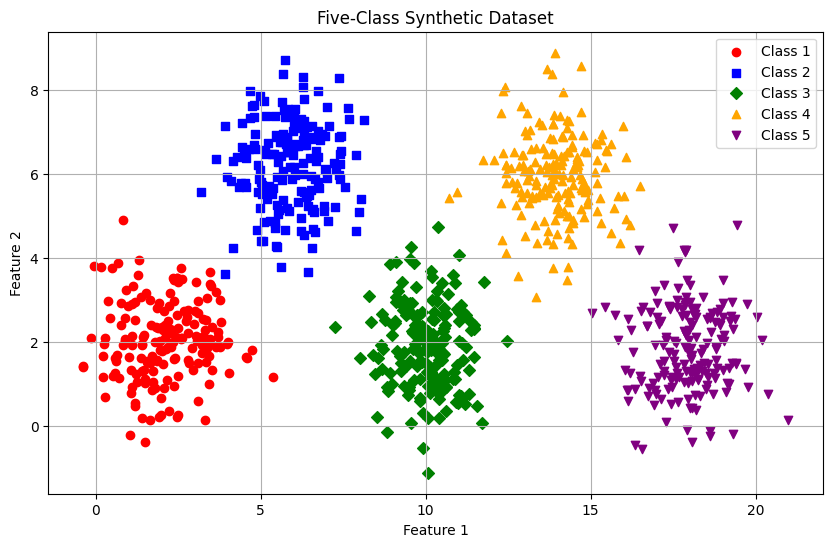

In [2]:
def generate_data(samples_per_class=180):
    np.random.seed(32)
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])
    class4 = np.random.randn(samples_per_class, 2) + np.array([14, 6])
    class5 = np.random.randn(samples_per_class, 2) + np.array([18, 2])
    X = np.vstack([class1, class2, class3, class4, class5])
    y = np.array([0]*samples_per_class + [1]*samples_per_class + [2]*samples_per_class + [3]*samples_per_class + [4]*samples_per_class)
    return X, y

X, y = generate_data()

# Simplified plotting
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 's', 'D', '^', 'v']

for i in range(5):
    plt.scatter(X[y==i, 0], X[y==i, 1],
                c=colors[i],
                marker=markers[i],
                label=f'Class {i+1}')

plt.title("Five-Class Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

plt.show()

**Splitting the data**

In [3]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 540 samples
Validation set: 180 samples
Test set: 180 samples


**Neural Network Class**

In [4]:
class NeuralNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr):
        self.W1 = np.random.randn(input_size, hidden_size1)
        self.W2 = np.random.randn(hidden_size1, hidden_size2)
        self.W3 = np.random.randn(hidden_size2, hidden_size3)
        self.W4 = np.random.randn(hidden_size3, output_size)
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        self.hidden_input1 = np.dot(x, self.W1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)
        self.hidden_input2 = np.dot(self.hidden_output1, self.W2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)
        self.hidden_input3 = np.dot(self.hidden_output2, self.W3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)
        self.output_input = np.dot(self.hidden_output3, self.W4)
        self.output = self.sigmoid(self.output_input)
        return self.output

    def backprop(self, x, y, output):
        output_error = y - output
        output_delta = output_error * self.sigmoid(output, derivative=True)
        hidden_error3 = np.dot(output_delta, self.W4.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, derivative=True)
        hidden_error2 = np.dot(hidden_delta3, self.W3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, derivative=True)
        hidden_error1 = np.dot(hidden_delta2, self.W2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, derivative=True)
        self.W4 += np.dot(self.hidden_output3.T, output_delta) * self.lr
        self.W3 += np.dot(self.hidden_output2.T, hidden_delta3) * self.lr
        self.W2 += np.dot(self.hidden_output1.T, hidden_delta2) * self.lr
        self.W1 += np.dot(x.T, hidden_delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

**Training the Neural Network**

In [5]:
input_size = X_train.shape[1]
hidden_size1 = 15
hidden_size2 = 15
hidden_size3 = 15
output_size = y_train.shape[1]
lr = 0.001
epochs = 900

nn = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")

Epoch 0: Train Loss = 0.2557, Validation Loss = 0.2531, Train Accuracy = 18.89%, Validation Accuracy = 20.56%
Epoch 50: Train Loss = 0.1383, Validation Loss = 0.1383, Train Accuracy = 56.11%, Validation Accuracy = 56.11%
Epoch 100: Train Loss = 0.1247, Validation Loss = 0.1252, Train Accuracy = 56.11%, Validation Accuracy = 60.00%
Epoch 150: Train Loss = 0.1146, Validation Loss = 0.1158, Train Accuracy = 65.00%, Validation Accuracy = 67.78%
Epoch 200: Train Loss = 0.1050, Validation Loss = 0.1069, Train Accuracy = 69.26%, Validation Accuracy = 63.89%
Epoch 250: Train Loss = 0.0971, Validation Loss = 0.0993, Train Accuracy = 73.70%, Validation Accuracy = 70.00%
Epoch 300: Train Loss = 0.0907, Validation Loss = 0.0931, Train Accuracy = 74.81%, Validation Accuracy = 71.67%
Epoch 350: Train Loss = 0.0848, Validation Loss = 0.0874, Train Accuracy = 77.59%, Validation Accuracy = 73.33%
Epoch 400: Train Loss = 0.0795, Validation Loss = 0.0822, Train Accuracy = 79.26%, Validation Accuracy = 73

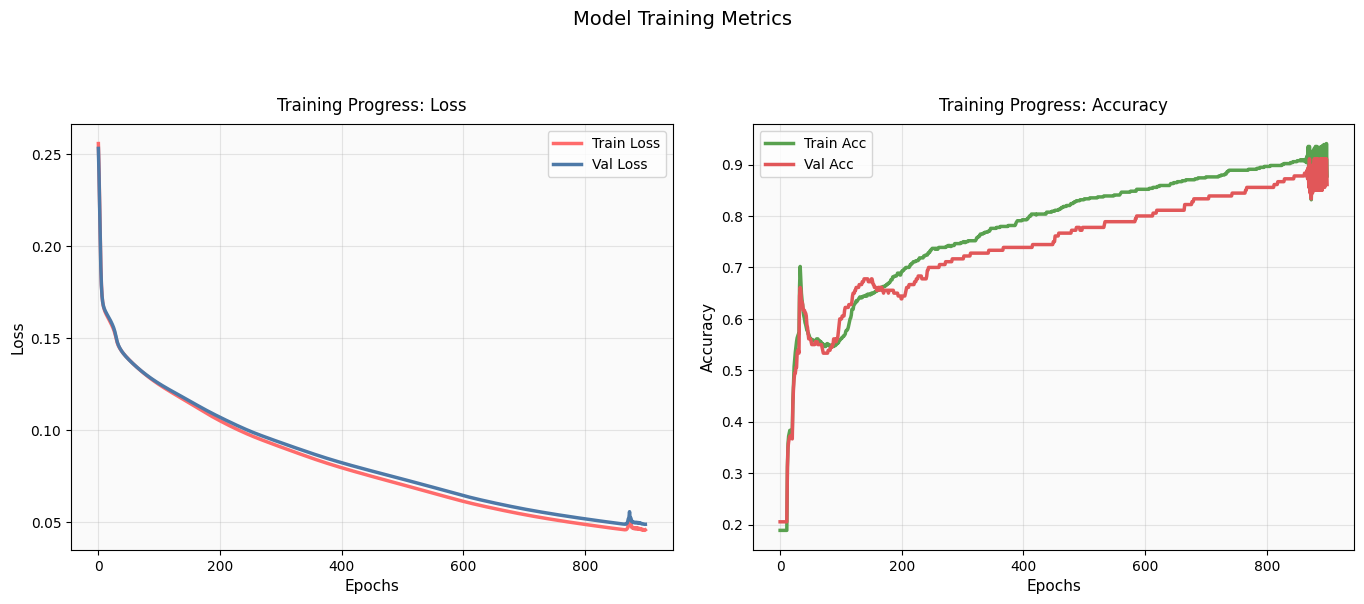

In [6]:
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, color='#FF6B6B', linestyle='-', linewidth=2.5, label="Train Loss")
plt.plot(val_losses, color='#4E79A7', linestyle='-', linewidth=2.5, label="Val Loss")
plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Loss", fontsize=11)
plt.title("Training Progress: Loss", fontsize=12, pad=10)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.gca().set_facecolor('#FAFAFA')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, color='#59A14F', linestyle='-', linewidth=2.5, label="Train Acc")
plt.plot(val_accuracies, color='#E15759', linestyle='-', linewidth=2.5, label="Val Acc")
plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.title("Training Progress: Accuracy", fontsize=12, pad=10)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.gca().set_facecolor('#FAFAFA')

plt.suptitle("Model Training Metrics", fontsize=14, y=1.02)
plt.tight_layout(pad=2.0)
plt.show()

**Compute Accuracy**

In [7]:
test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 87.78%


**Predictions vs Actual Plot**

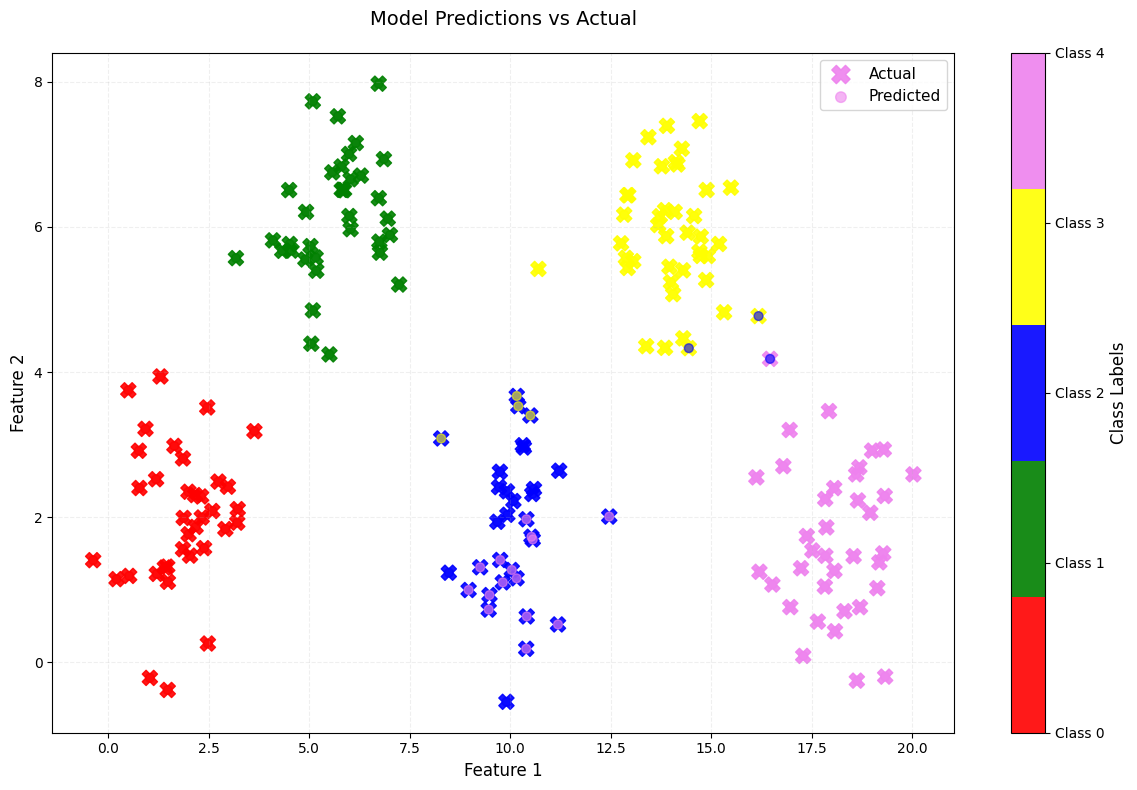

In [8]:
plt.figure(figsize=(12, 8))

# Define custom colors and create colormap
custom_colors = ['red', 'green', 'blue', 'yellow', 'violet']
custom_cmap = ListedColormap(custom_colors)

# Plot actual and predicted points
scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap=custom_cmap,
                            s=120, marker='X', alpha=0.9, label='Actual', vmin=0, vmax=4)
scatter_pred = plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap=custom_cmap,
                           s=40, marker='o', alpha=0.6, label='Predicted', vmin=0, vmax=4)

plt.title("Model Predictions vs Actual", fontsize=14, pad=20)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(fontsize=11, markerscale=1.2)

plt.grid(True, linestyle='--', alpha=0.2)

# Add colorbar
cbar = plt.colorbar(scatter_actual, ticks=np.arange(len(custom_colors)))
cbar.set_label('Class Labels', fontsize=12)
cbar.set_ticklabels([f'Class {i}' for i in range(len(custom_colors))])

plt.tight_layout()
plt.show()

**Decision Boundary Plot**

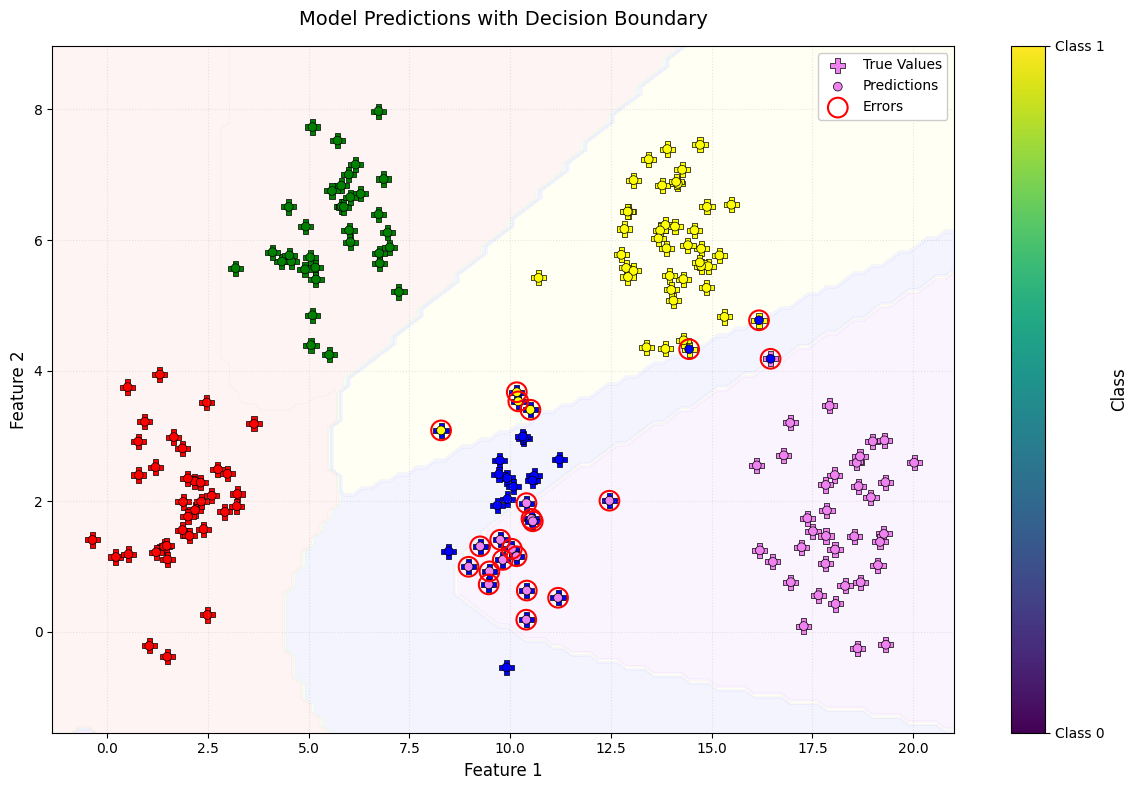

In [9]:
plt.figure(figsize=(12, 8))

# Define custom colors
custom_colors = ['red', 'green', 'blue', 'yellow', 'violet']
custom_cmap = ListedColormap(custom_colors)
pastel_cmap = ListedColormap(['#ffcccc', '#ccffcc', '#ccccff', '#ffffcc', '#e6ccff'])  # Pastel versions

# Create decision boundary background
xx, yy = np.meshgrid(np.linspace(X_test[:,0].min()-1, X_test[:,0].max()+1, 100),
                     np.linspace(X_test[:,1].min()-1, X_test[:,1].max()+1, 100))
Z = np.argmax(nn.feed_forward(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=pastel_cmap, vmin=0, vmax=4)

# Plot predictions and actual values
plt.scatter(X_test[:,0], X_test[:,1], c=actual_classes, cmap=custom_cmap,
            s=120, marker='P', edgecolor='k', linewidth=0.5, label='True Values', vmin=0, vmax=4)
plt.scatter(X_test[:,0], X_test[:,1], c=predicted_classes, cmap=custom_cmap,
            s=40, marker='o', edgecolor='k', linewidth=0.5, label='Predictions', vmin=0, vmax=4)

# Highlight misclassified points
misclassified = predicted_classes != actual_classes
plt.scatter(X_test[misclassified,0], X_test[misclassified,1], s=200,
            facecolors='none', edgecolors='r', linewidth=1.5, label='Errors')

# Formatting
plt.title('Model Predictions with Decision Boundary', fontsize=14, pad=15)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(fontsize=10, framealpha=1)

# Custom colorbar
cbar = plt.colorbar(ticks=range(len(custom_colors)))
cbar.set_label('Class', fontsize=12)
cbar.set_ticklabels([f'Class {i}' for i in range(len(custom_colors))])

plt.grid(True, linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

**In summary, this assignment involved developing and evaluating a multi-class classification model, which demonstrated strong performance in learning the patterns within the generated dataset and achieving high accuracy. Key challenges included designing an appropriate neural network architecture and effectively preprocessing the data.  Lessons learned emphasize the importance of careful data handling, model selection, and thorough validation.  Future work could explore different architectures, optimization algorithms, and techniques like data augmentation and regularization to further enhance the model's performance for multi-class classification tasks.**